<a href="https://colab.research.google.com/github/Cristopher955/autoloop-landing/blob/main/01_simulacion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install numpy pandas matplotlib scikit-learn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
np.random.seed(42)


In [32]:
# Generar rango de fechas
fecha_inicio = datetime(2023, 1, 1)
n_dias = 365

fechas = [fecha_inicio + timedelta(days=i) for i in range(n_dias)]

# Variables simuladas
temperatura = 70 + np.random.normal(0, 2, n_dias)
vibracion = 3 + np.random.normal(0, 0.3, n_dias)
presion = 120 + np.random.normal(0, 5, n_dias)

# Simular fallas aumentando ruido
for i in range(300, 330):
    temperatura[i] += np.random.normal(10, 3)
    vibracion[i] += np.random.normal(2, 0.5)
    presion[i] += np.random.normal(20, 8)

# Etiqueta de falla (1 = falla incipiente)
estado = [1 if 300 <= i <= 330 else 0 for i in range(n_dias)]

df = pd.DataFrame({
    "fecha": fechas,
    "temperatura": temperatura,
    "vibracion": vibracion,
    "presion": presion,
    "falla": estado
})

df.head()

,fecha,temperatura,vibracion,presion,falla
0,2023-01-01,70.993428,2.879634,120.979226,0
1,2023-01-02,69.723471,3.067228,115.108136,0
2,2023-01-03,71.295377,3.003778,122.041264,0
3,2023-01-04,73.046060,3.029303,111.487082,0
4,2023-01-05,69.531693,2.768097,125.145778,0


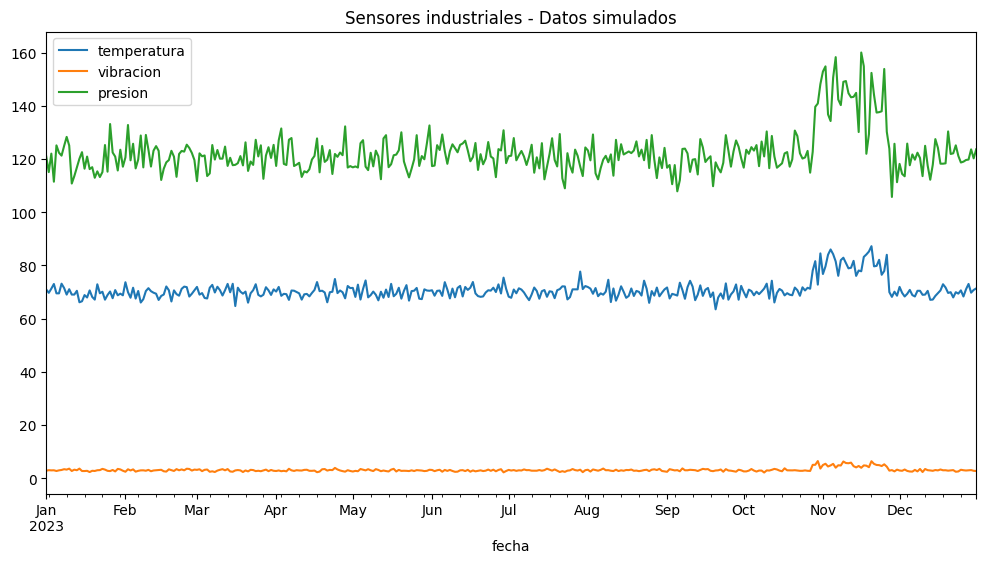

In [33]:
df.plot(x='fecha', y=['temperatura', 'vibracion', 'presion'], figsize=(12,6))
plt.title("Sensores industriales - Datos simulados")
plt.show()

In [34]:
df.to_csv("datos_mantenimiento_simulados.csv", index=False)
print("✅ Dataset guardado")

✅ Dataset guardado


ANALISIS Y DETECCION DE PATRONES

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_mantenimiento_simulados.csv")
df ["fecha"] = pd.to_datetime(df["fecha"])
df.head()

,fecha,temperatura,vibracion,presion,falla
0,2023-01-01,70.993428,2.879634,120.979226,0
1,2023-01-02,69.723471,3.067228,115.108136,0
2,2023-01-03,71.295377,3.003778,122.041264,0
3,2023-01-04,73.046060,3.029303,111.487082,0
4,2023-01-05,69.531693,2.768097,125.145778,0


In [36]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        365 non-null    datetime64[ns]
 1   temperatura  365 non-null    float64       
 2   vibracion    365 non-null    float64       
 3   presion      365 non-null    float64       
 4   falla        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


,fecha,temperatura,vibracion,presion,falla
count,365,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,70.858779,3.154414,122.455747,0.084932
min,2023-01-01 00:00:00,63.517465,2.190934,105.757287,0.000000
25%,2023-04-02 00:00:00,68.796587,2.804807,117.489729,0.000000
50%,2023-07-02 00:00:00,70.221845,3.014220,121.041914,0.000000
75%,2023-10-01 00:00:00,71.625052,3.260882,124.981334,0.000000
max,2023-12-31 00:00:00,87.252486,6.495385,160.036578,1.000000
std,NaN,3.625963,0.660402,8.152110,0.279162


<function matplotlib.pyplot.show(close=None, block=None)>

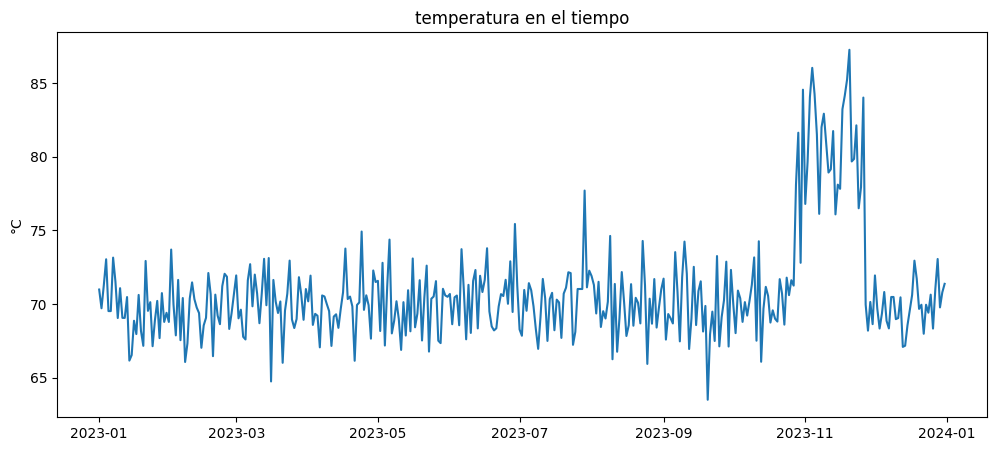

In [37]:
plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["temperatura"])
plt.title("temperatura en el tiempo")
plt.ylabel("°C")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

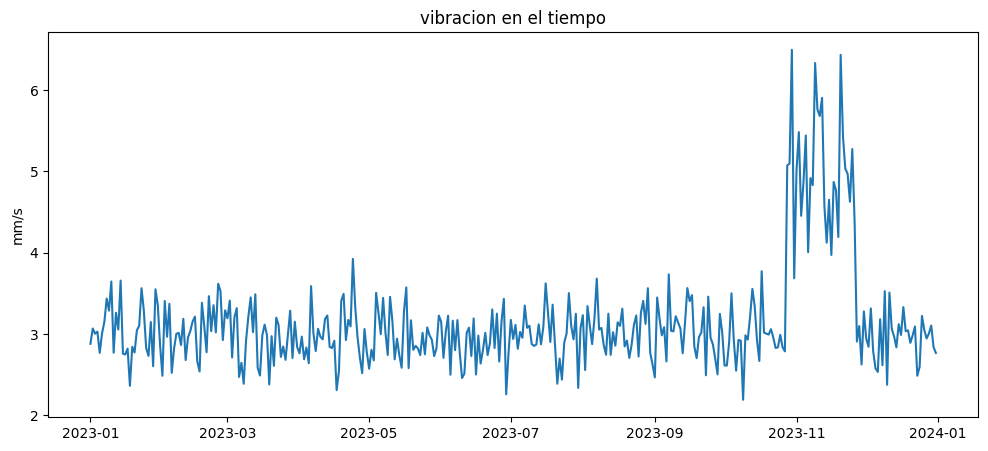

In [38]:
plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["vibracion"])
plt.title("vibracion en el tiempo")
plt.ylabel("mm/s")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

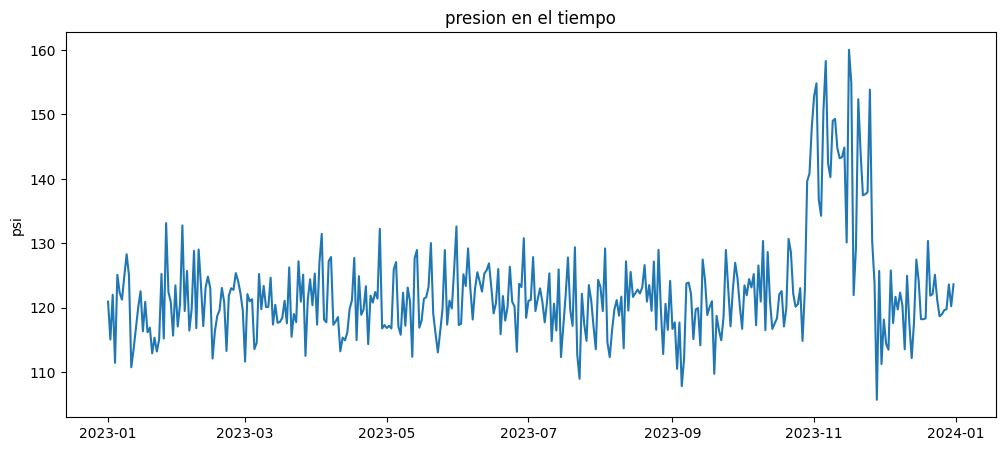

In [39]:
plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["presion"])
plt.title("presion en el tiempo")
plt.ylabel("psi")
plt.show

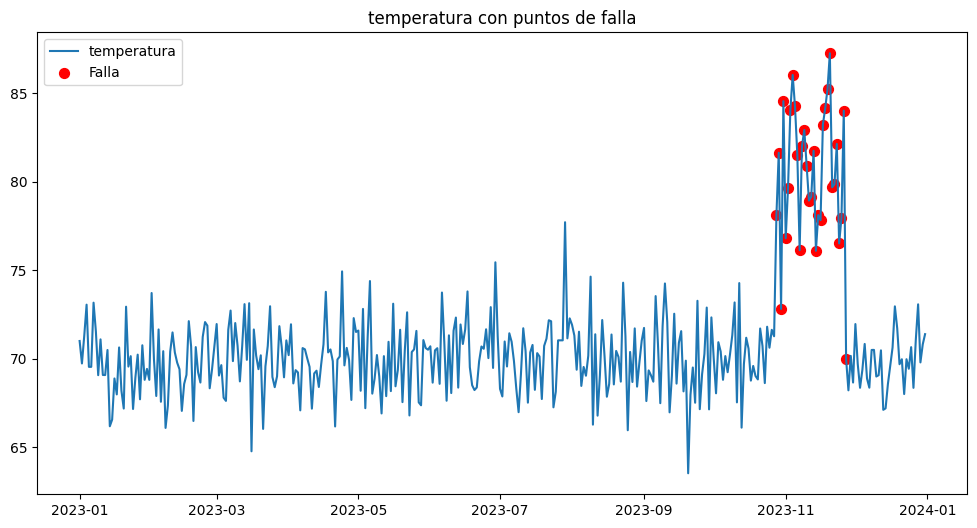

In [40]:
fallas = df[df["falla"] == 1]
plt.figure(figsize=(12,6))
plt.plot(df["fecha"], df["temperatura"], label="temperatura")
plt.scatter(fallas["fecha"], fallas["temperatura"], color="red", label="Falla", s=50)
plt.title("temperatura con puntos de falla")
plt.legend()
plt.show()


In [41]:
corr = df[["temperatura", "vibracion", "presion"]].corr()
corr

,temperatura,vibracion,presion
temperatura,1.000000,0.665624,0.628833
vibracion,0.665624,1.000000,0.663233
presion,0.628833,0.663233,1.000000


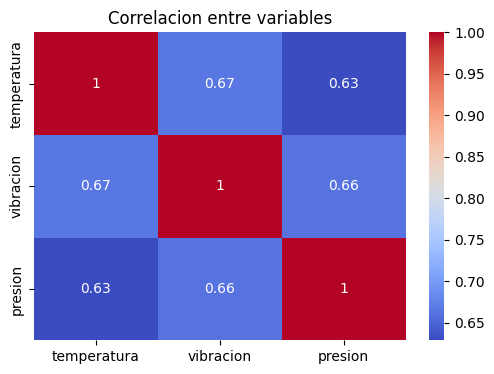

In [42]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlacion entre variables")
plt.show()

DETECCION DE ANOMALIAS

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv("datos_mantenimiento_simulados.csv")
df["fecha"] = pd.to_datetime(df["fecha"])
df.head()

,fecha,temperatura,vibracion,presion,falla
0,2023-01-01,70.993428,2.879634,120.979226,0
1,2023-01-02,69.723471,3.067228,115.108136,0
2,2023-01-03,71.295377,3.003778,122.041264,0
3,2023-01-04,73.046060,3.029303,111.487082,0
4,2023-01-05,69.531693,2.768097,125.145778,0


In [44]:
#columnas para el modelo
x = df[["temperatura", "vibracion", "presion"]]

In [45]:
#entrar insolation forest

modelo = IsolationForest(contamination=0.05, random_state=42)
df["anomalia"] = modelo.fit_predict(x)

In [46]:
# 1 =normal  -1 =animalia
#convetir 0/1 para mejorar la lectura
df["anomalia"] = df['anomalia'].apply(lambda x: 1 if x == -1 else 0)
df.head()

,fecha,temperatura,vibracion,presion,falla,anomalia
0,2023-01-01,70.993428,2.879634,120.979226,0,0
1,2023-01-02,69.723471,3.067228,115.108136,0,0
2,2023-01-03,71.295377,3.003778,122.041264,0,0
3,2023-01-04,73.046060,3.029303,111.487082,0,0
4,2023-01-05,69.531693,2.768097,125.145778,0,0


In [47]:
# para ver cuantas anomalias detecto
df['anomalia'].value_counts()

,count
anomalia,
0,346
1,19


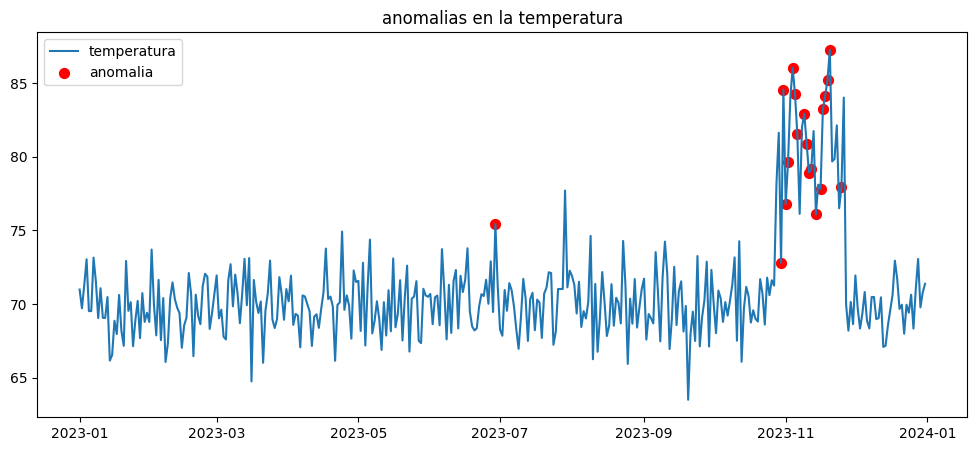

In [48]:
#graficar anomalias vs temperatura

anom = df[df["anomalia"] == 1]

plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["temperatura"], label="temperatura")
plt.scatter(anom["fecha"], anom["temperatura"], color="red", label="anomalia", s=50)
plt.title("anomalias en la temperatura")
plt.legend()
plt.show()

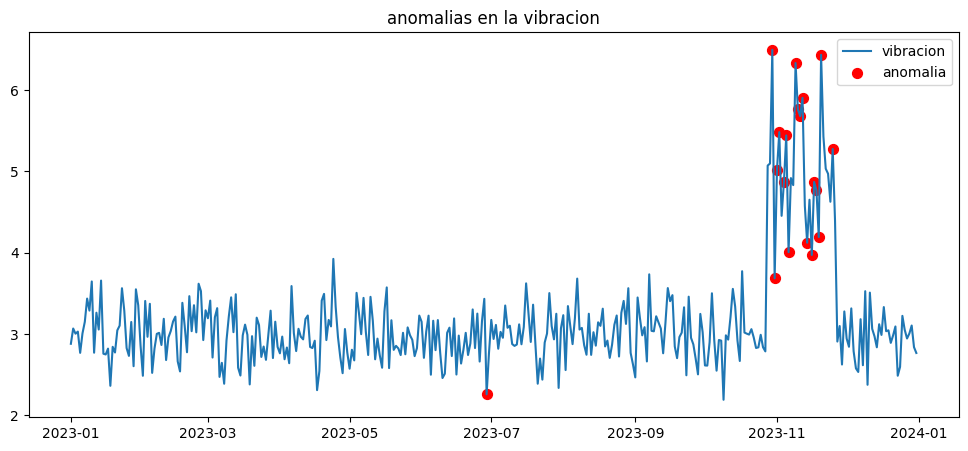

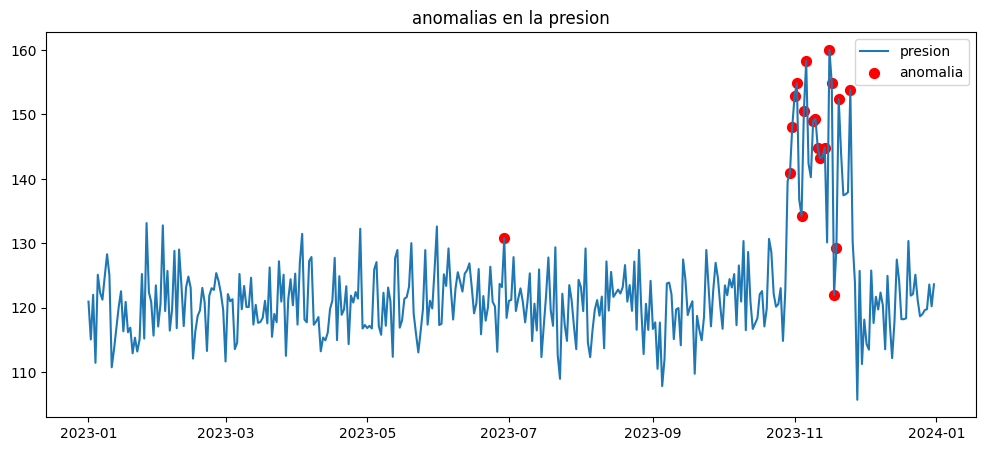

In [49]:
#vibracion y presion cambiando columna

plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["vibracion"], label="vibracion")
plt.scatter(anom["fecha"], anom["vibracion"], color="red", label="anomalia", s=50)
plt.title("anomalias en la vibracion")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["presion"], label="presion")
plt.scatter(anom["fecha"], anom["presion"], color="red", label="anomalia", s=50)
plt.title("anomalias en la presion")
plt.legend()
plt.show()

In [28]:
#sistema detecta cuando la máquina se comporta raro
#ver los puntos donde algo anda mal
#base para alertas tempranas
#Primer módulo real de IA industrial

PREDECCION DE PRODUCCION MINERO

In [3]:
import pandas as pd

# Dataset simulado de producción
data = {
    'date': [
        '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
        '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
        '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'
    ],
    'production': [1000, 950, 1050, 1100, 1000, 980, 1200, 1250, 1100, 1080, 1150, 1300]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
print(df)

         date  production
0  2024-01-01        1000
1  2024-02-01         950
2  2024-03-01        1050
3  2024-04-01        1100
4  2024-05-01        1000
5  2024-06-01         980
6  2024-07-01        1200
7  2024-08-01        1250
8  2024-09-01        1100
9  2024-10-01        1080
10 2024-11-01        1150
11 2024-12-01        1300


In [2]:
!pip install numpy==1.26.4 --quiet
!pip install prophet cmdstanpy --quiet

In [8]:
!pip install numpy==1.26.4 --quiet
!pip install pystan==2.19.1.1 --quiet
!pip install prophet==1.1.5 --quiet
!pip install cmdstanpy==1.1.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.5 MB/s eta 0:00:00


In [1]:
import cmdstanpy
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.37.0
Install directory: /root/.cmdstan
CmdStan version 2.37.0 already installed


True

In [4]:
from prophet import Prophet

df_prophet = df.rename(columns={'date':'ds', 'production':'y'})

model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubl_dyoy/im_f__ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubl_dyoy/_wc2ykkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23018', 'data', 'file=/tmp/tmpubl_dyoy/im_f__ep.json', 'init=/tmp/tmpubl_dyoy/_wc2ykkz.json', 'output', 'file=/tmp/tmpubl_dyoy/prophet_modeleonl6px5/prophet_model-20251104195318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:53:18 - cmdstanpy - INFO - Chain [1] start processing
IN

yhat → predicción

yhat_lower / upper → rango de fallo (incertidumbre)


In [5]:
future = model.make_future_dataframe(periods=6, freq='M')  # 6 meses extra
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
8,2024-09-01,1151.816252,1054.014999,1249.829727
9,2024-10-01,1173.398037,1077.725142,1269.133227
10,2024-11-01,1195.699215,1105.962195,1293.182002
11,2024-12-01,1217.281000,1121.094778,1313.195830
12,2024-12-31,1238.862785,1151.102887,1333.881601
13,2025-01-31,1261.163963,1166.243187,1355.475797
14,2025-02-28,1281.306962,1181.993874,1371.865081
15,2025-03-31,1303.608140,1205.618398,1393.051425
16,2025-04-30,1325.189925,1232.365279,1414.875018
17,2025-05-31,1347.491103,1252.658060,1439.847014


In [6]:
from prophet.plot import plot_plotly
import plotly.graph_objects as go

fig = plot_plotly(model, forecast)
fig.show()

In [7]:
#alerta cuando producción baja (Falla posible)

#Esto simula mantenimiento predictivo simple

import numpy as np

forecast['alert'] = np.where(
    forecast['yhat'] < forecast['yhat'].rolling(3).mean() * 0.9,
    " Posible falla / baja rendimiento",
    " Operación normal"
)

forecast.tail(10)[['ds','yhat','alert']]

,ds,yhat,alert
8,2024-09-01,1151.816252,Operación normal
9,2024-10-01,1173.398037,Operación normal
10,2024-11-01,1195.699215,Operación normal
11,2024-12-01,1217.281000,Operación normal
12,2024-12-31,1238.862785,Operación normal
13,2025-01-31,1261.163963,Operación normal
14,2025-02-28,1281.306962,Operación normal
15,2025-03-31,1303.608140,Operación normal
16,2025-04-30,1325.189925,Operación normal
17,2025-05-31,1347.491103,Operación normal


Dashboard Industrial (tipo minería / mantenimiento)

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

# Datos reales
fig.add_trace(go.Scatter(
    x=df_prophet['ds'],
    y=df_prophet['y'],
    mode='lines+markers',
    name='Producción real'
))

# Predicción
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Predicción'
))

# Zona de riesgo inferior
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill=None,
    mode='lines',
    name='Límite inferior'
))

# Zona superior para sombrear
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    fill='tonexty',
    mode='lines',
    name='Límite superior'
))

fig.update_layout(
    title='Dashboard de Producción y Predicción - Sistema IA Industrial',
    xaxis_title='Fecha',
    yaxis_title='Producción',
)
fig.show()

Panel de alertas estilo SCADA

In [9]:
alerts = forecast[['ds', 'yhat', 'alert']].tail(10)
alerts

,ds,yhat,alert
8,2024-09-01,1151.816252,Operación normal
9,2024-10-01,1173.398037,Operación normal
10,2024-11-01,1195.699215,Operación normal
11,2024-12-01,1217.281000,Operación normal
12,2024-12-31,1238.862785,Operación normal
13,2025-01-31,1261.163963,Operación normal
14,2025-02-28,1281.306962,Operación normal
15,2025-03-31,1303.608140,Operación normal
16,2025-04-30,1325.189925,Operación normal
17,2025-05-31,1347.491103,Operación normal


In [10]:
#lógica visual

for i,row in alerts.iterrows():
    status = "🟢 OK" if "normal" in row['alert'] else "🔴 ALERTA"
    print(f"{row['ds'].date()} | {status} | Predicción: {row['yhat']:.2f}")

2024-09-01 | 🟢 OK | Predicción: 1151.82
2024-10-01 | 🟢 OK | Predicción: 1173.40
2024-11-01 | 🟢 OK | Predicción: 1195.70
2024-12-01 | 🟢 OK | Predicción: 1217.28
2024-12-31 | 🟢 OK | Predicción: 1238.86
2025-01-31 | 🟢 OK | Predicción: 1261.16
2025-02-28 | 🟢 OK | Predicción: 1281.31
2025-03-31 | 🟢 OK | Predicción: 1303.61
2025-04-30 | 🟢 OK | Predicción: 1325.19
2025-05-31 | 🟢 OK | Predicción: 1347.49


In [11]:
# exportar datos para el dashboard / repo

forecast.to_csv("forecast.csv", index=False)
df_prophet.to_csv("historical_data.csv", index=False)
print("✅ guardados: forecast.csv y historical_data.csv")

✅ guardados: forecast.csv y historical_data.csv


In [12]:
import joblib
joblib.dump(model, "prophet_model.joblib")
print("✅ modelo guardado: prophet_model.joblib")

✅ modelo guardado: prophet_model.joblib


Funciones reutilizables (predict + alert generator)

In [13]:
import numpy as np
import pandas as pd
from datetime import timedelta

def generate_forecast(model, periods=6, freq='M'):
    """Genera forecast a partir de un modelo Prophet ya entrenado."""
    future = model.make_future_dataframe(periods=periods, freq=freq)
    fc = model.predict(future)
    return fc

def generate_alerts(forecast_df, window=3, drop_pct=0.10):
    """Marca alertas donde yhat baja más de drop_pct respecto a rolling(window)."""
    # asegurarse orden por fecha
    forecast_df = forecast_df.sort_values('ds').copy()
    forecast_df['trend_roll'] = forecast_df['yhat'].rolling(window=window, min_periods=1).mean()
    forecast_df['alert'] = np.where(forecast_df['yhat'] < forecast_df['trend_roll'] * (1 - drop_pct),
                                    "ALERTA: posible baja/falla",
                                    "OK")
    return forecast_df

# ejemplo de uso
new_forecast = generate_forecast(model, periods=6, freq='M')
new_forecast = generate_alerts(new_forecast, window=3, drop_pct=0.10)
new_forecast[['ds','yhat','yhat_lower','yhat_upper','alert']].tail(10)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,ds,yhat,yhat_lower,yhat_upper,alert
8,2024-09-01,1151.816252,1063.941952,1246.879461,OK
9,2024-10-01,1173.398037,1075.850188,1267.489636,OK
10,2024-11-01,1195.699215,1102.158857,1291.929372,OK
11,2024-12-01,1217.281000,1123.106695,1313.244542,OK
12,2024-12-31,1238.862785,1143.709793,1337.905944,OK
13,2025-01-31,1261.163963,1172.322033,1363.494188,OK
14,2025-02-28,1281.306962,1181.824043,1376.519699,OK
15,2025-03-31,1303.608140,1205.557585,1396.520334,OK
16,2025-04-30,1325.189925,1228.165285,1416.464060,OK
17,2025-05-31,1347.491103,1249.063823,1442.598803,OK


Exportar alertas a CSV (para que Streamlit/BI lo lea)

In [14]:
new_forecast[['ds','yhat','yhat_lower','yhat_upper','alert']].to_csv("alerts.csv", index=False)
print("✅ alerts.csv listo")

✅ alerts.csv listo


In [15]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00


In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.title("Sistema de Predicción y Análisis Industrial")

uploaded_file = st.file_uploader("Sube tu dataset", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("### Vista del dataset")
    st.dataframe(df)

    # Si existe columna fecha
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"])
        fig = px.line(df, x="date", y=df.columns[1], title="Datos cargados")
        st.plotly_chart(fig)
    else:
        st.error("La columna 'date' no existe en el archivo!")

Writing app.py


In [17]:
from pyngrok import ngrok

# Cerrar túneles existentes
ngrok.kill()

In [18]:
from pyngrok import ngrok

ngrok.set_auth_token("34znblMiPxBfyfNP3UjVy3RgD7y_7sMEeUcG3nBQSaPRmfBwp")

In [19]:

public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://unpersonifying-nelly-renay.ngrok-free.dev" -> "http://localhost:8501">

In [20]:
print("Hist type:", type(hist))
print("Forecast type:", type(forecast))

NameError: name 'hist' is not defined

In [21]:
import pandas as pd

# Datos base que diste (mensual)
data = {
    'date': [
        '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
        '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
        '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'
    ],
    'production': [1000, 950, 1050, 1100, 1000, 980, 1200, 1250, 1100, 1080, 1150, 1300]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Convertir a rango semanal
weekly = pd.date_range(start="2024-01-01", end="2024-12-31", freq="W-MON")
df_weekly = pd.DataFrame({"ds": weekly})

# Simular fallas semanal (0 sin falla, 1 con falla)
import numpy as np
np.random.seed(42)
df_weekly["y"] = np.random.binomial(1, p=0.15, size=len(df_weekly))  # 15% prob falla semanal

print(df_weekly.head(), "\n")
print(df_weekly.tail())

df_weekly.to_csv("fallas_caex_semana.csv", index=False)
print("\n✅ Dataset semanal de fallas generado: fallas_caex_semana.csv listo!")

          ds  y
0 2024-01-01  0
1 2024-01-08  1
2 2024-01-15  0
3 2024-01-22  0
4 2024-01-29  0 

           ds  y
48 2024-12-02  0
49 2024-12-09  0
50 2024-12-16  1
51 2024-12-23  0
52 2024-12-30  1

✅ Dataset semanal de fallas generado: fallas_caex_semana.csv listo!


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubl_dyoy/zuw80fzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubl_dyoy/knhgvg9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61790', 'data', 'file=/tmp/tmpubl_dyoy/zuw80fzh.json', 'init=/tmp/tmpubl_dyoy/knhgvg9i.json', 'output', 'file=/tmp/tmpubl_dyoy/prophet_modelmjde56mp/prophet_model-20251104195440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

           ds      yhat  yhat_lower  yhat_upper
53 2025-01-05  0.380434   -0.063569    0.820662
54 2025-01-12  0.383950   -0.086070    0.844710
55 2025-01-19  0.387466   -0.064322    0.875137
56 2025-01-26  0.390982   -0.047175    0.853533
57 2025-02-02  0.394498   -0.038948    0.850155
58 2025-02-09  0.398014   -0.085350    0.859214
59 2025-02-16  0.401530   -0.023402    0.836767
60 2025-02-23  0.405046   -0.069061    0.833302
61 2025-03-02  0.408562   -0.069341    0.822438
62 2025-03-09  0.412078   -0.070094    0.873841
63 2025-03-16  0.415594   -0.037818    0.872620
64 2025-03-23  0.419110    0.001019    0.866862


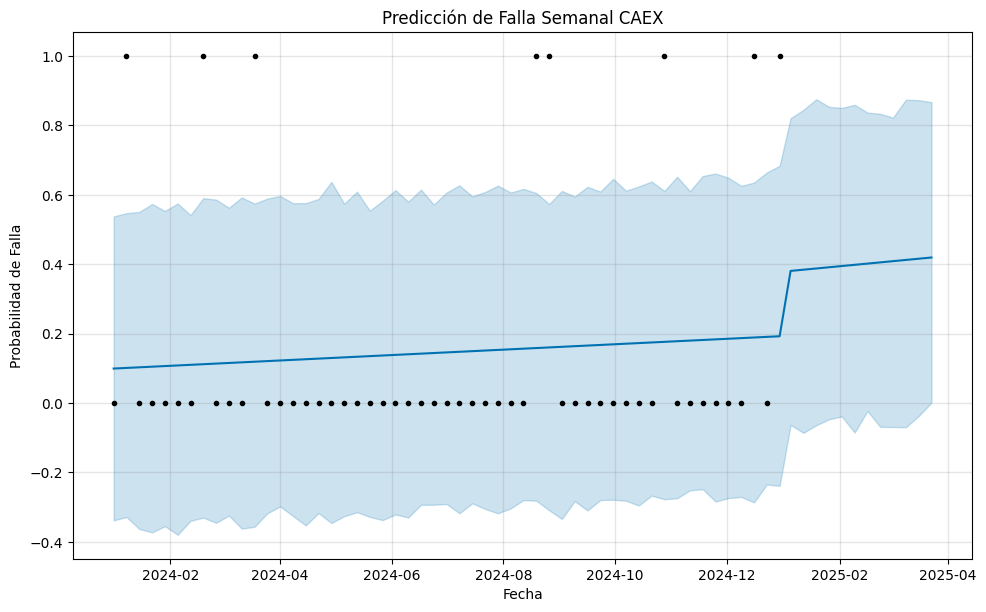

In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("fallas_caex_semana.csv")

# Asegurar formato Prophet
df['ds'] = pd.to_datetime(df['ds'])
df = df[['ds','y']]

# Modelo
model = Prophet(
    seasonality_mode='multiplicative',
    weekly_seasonality=True
)

model.fit(df)

# Generar futuro 12 semanas
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Mostrar últimas predicciones
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12))

# Plot
model.plot(forecast)
plt.title("Predicción de Falla Semanal CAEX")
plt.xlabel("Fecha")
plt.ylabel("Probabilidad de Falla")
plt.show()

Sistema de Alertas Inteligente

In [23]:
# Crear alertas basado en predicciones

alerts = forecast[['ds','yhat']].copy()
alerts['alert_level'] = alerts['yhat'].apply(
    lambda x: "🚨 Alta probabilidad de falla" if x >= 0.5
    else ("⚠️ Riesgo medio" if x >= 0.25 else "✅ Bajo riesgo")
)

alerts.tail(12)

,ds,yhat,alert_level
53,2025-01-05,0.380434,⚠️ Riesgo medio
54,2025-01-12,0.383950,⚠️ Riesgo medio
55,2025-01-19,0.387466,⚠️ Riesgo medio
56,2025-01-26,0.390982,⚠️ Riesgo medio
57,2025-02-02,0.394498,⚠️ Riesgo medio
58,2025-02-09,0.398014,⚠️ Riesgo medio
59,2025-02-16,0.401530,⚠️ Riesgo medio
60,2025-02-23,0.405046,⚠️ Riesgo medio
61,2025-03-02,0.408562,⚠️ Riesgo medio
62,2025-03-09,0.412078,⚠️ Riesgo medio


Recomendación automática (simulada)

In [24]:
def recomendacion(risk):
    if risk == "🚨 Alta probabilidad de falla":
        return "Realizar mantenimiento inmediato, revisar motor, filtros, sistema hidráulico."
    elif risk == "⚠️ Riesgo medio":
        return "Programar inspección preventiva, monitorear vibraciones y temperatura."
    else:
        return "Continuar operación normal y monitorear parámetros."

alerts["recommendation"] = alerts["alert_level"].apply(recomendacion)
alerts.tail(12)

,ds,yhat,alert_level,recommendation
53,2025-01-05,0.380434,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
54,2025-01-12,0.383950,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
55,2025-01-19,0.387466,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
56,2025-01-26,0.390982,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
57,2025-02-02,0.394498,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
58,2025-02-09,0.398014,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
59,2025-02-16,0.401530,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
60,2025-02-23,0.405046,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
61,2025-03-02,0.408562,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."
62,2025-03-09,0.412078,⚠️ Riesgo medio,"Programar inspección preventiva, monitorear vi..."


crear tu dashboard básico en Streamlit

In [25]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="Predicción de Falla CAEX", layout="wide")

st.title("🛠️ Sistema Predictivo de Mantenimiento para CAEX")

st.subheader("📊 Predicción de fallas futuras")

# Cargar datos (del modelo)
df = pd.read_csv("data.csv")
forecast = pd.read_csv("forecast.csv")
alerts = pd.read_csv("alerts.csv")

col1, col2 = st.columns(2)

with col1:
    fig1 = px.line(df, x='ds', y='y', title='Histórico de Producción/Falla')
    st.plotly_chart(fig1, use_container_width=True)

with col2:
    fig2 = px.line(forecast, x='ds', y='yhat', title='Predicción de Fallas')
    st.plotly_chart(fig2, use_container_width=True)

st.subheader("⚠️ Alertas de Mantenimiento")
st.dataframe(alerts)

Overwriting app.py


In [26]:
df.to_csv("data.csv", index=False)
forecast.to_csv("forecast.csv", index=False)
alerts.to_csv("alerts.csv", index=False)

In [27]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.173.23:8501

  Stopping...
^C
